In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# при необходимости поменяйте путь к данным
df = pd.read_csv("howpop_train.csv")

In [3]:
df.shape

(134137, 17)

Избавимся сразу от переменных, названия которых заканчиваются на _lognorm (нужны для соревнования на Kaggle). Выберем их с помощью filter() и удалим drop-ом:

In [4]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [6]:
df.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/18284/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [7]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (15, 5), "axes.titlesize": 18})

Столбец published (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу datetime:

In [8]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [9]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   url          134137 non-null  object        
 1   domain       134137 non-null  object        
 2   post_id      134137 non-null  int64         
 3   published    134137 non-null  datetime64[ns]
 4   author       97657 non-null   object        
 5   flow         97048 non-null   object        
 6   polling      134137 non-null  bool          
 7   content_len  134137 non-null  int64         
 8   title        134137 non-null  object        
 9   comments     134137 non-null  int64         
 10  favs         134137 non-null  int64         
 11  views        134137 non-null  int64         
 12  votes_plus   133566 non-null  float64       
 13  votes_minus  133566 non-null  float64       
 14  year         134137 non-null  int64         
 15  month        134137 non-null  int6

### 1. В каком месяце (и какого года) было больше всего публикаций?

<AxesSubplot: xlabel='month', ylabel='count'>

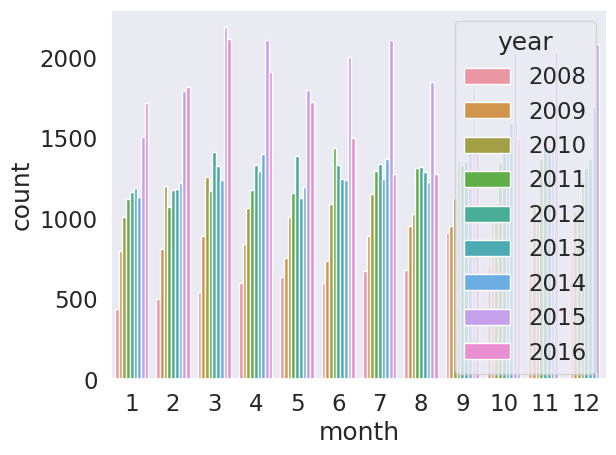

In [23]:
sns.countplot(data=df, x=df.month, hue=df.year)

### 2. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

Один или несколько дней сильно выделяются из общей картины
На хабре всегда больше статей, чем на гиктаймсе
По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей
Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

<AxesSubplot: xlabel='domain', ylabel='count'>

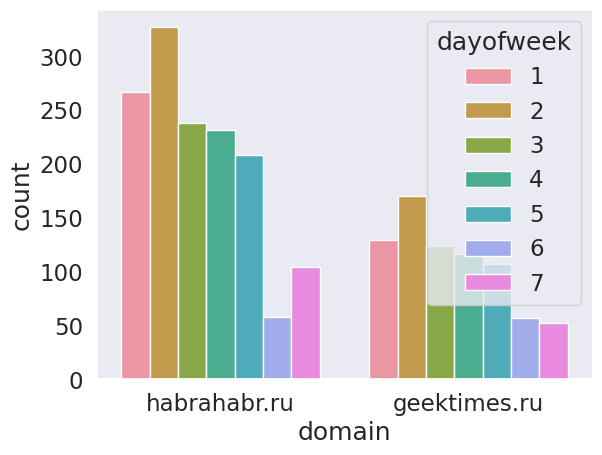

In [35]:
df2 = df[(df["year"]==2015) & (df['month']==3)]
sns.countplot(data=df2, x=df2.domain, hue=df.dayofweek)

In [41]:
print(df2[(df2.domain=='geektimes.ru') & (df2.dayofweek==6)].url.count())
print(df2[(df2.domain=='habrahabr.ru') & (df2.dayofweek==6)].url.count())

57
58


### 3. Когда лучше всего публиковать статью?

Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
У опубликованных в 10 утра постов больше всего комментариев
Больше всего просмотров набирают статьи, опубликованные в 6 часов утра
Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
На хабре дневные статьи комментируют чаще, чем вечерние

<AxesSubplot: xlabel='hour', ylabel='views'>

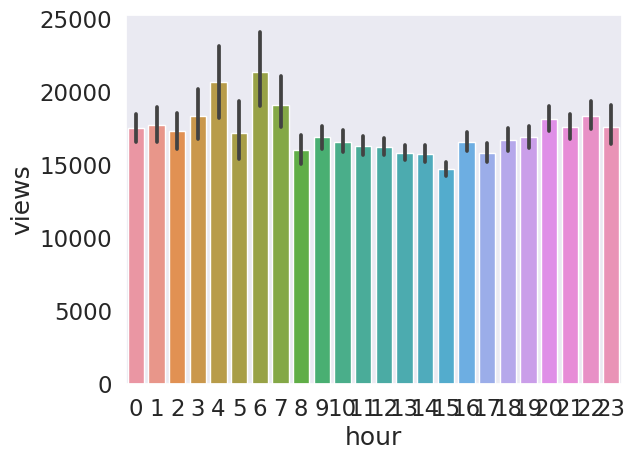

In [43]:
sns.barplot(data=df, x=df.hour, y=df.views)

<AxesSubplot: xlabel='hour', ylabel='comments'>

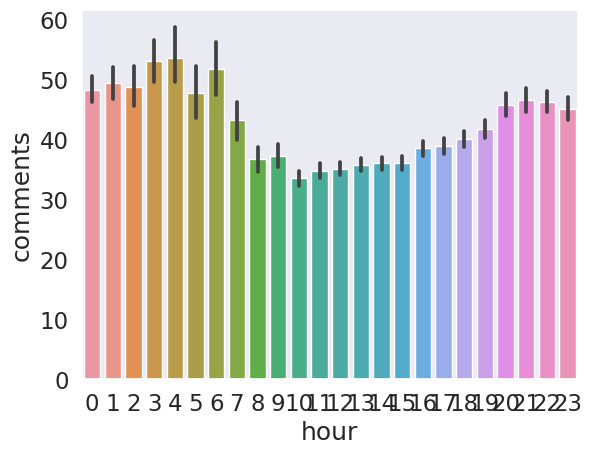

In [44]:
sns.barplot(data=df, x=df.hour, y=df.comments)

In [45]:
df[df.comments==df.comments.max()]

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
38763,https://geektimes.ru/post/123157/,geektimes.ru,123157,2011-07-01 02:35:00,@Dottore,NaN,False,2158,Как раздавать инвайты на Google+,2266,24,15300,226.0,55.0,2011,7,5,2


<AxesSubplot: xlabel='hour', ylabel='comments'>

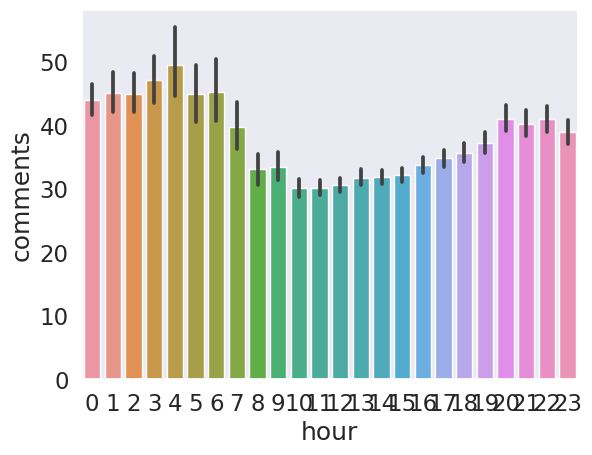

In [46]:
df3= df[df.domain!='geektimes.ru']
sns.barplot(data=df3, x=df3.hour, y=df3.comments)

### 4. Кого из топ-20 авторов чаще всего минусуют?

In [47]:
df.head(10)

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14
5,https://habrahabr.ru/post/18295/,habrahabr.ru,18295,2008-01-02 16:14:00,@lvea,develop,False,3171,Mobile2.0 Всеобщая доступность,22,1,192,9.0,2.0,2008,1,3,16
6,https://geektimes.ru/post/18306/,geektimes.ru,18306,2008-01-03 12:55:00,@abbasov,NaN,False,435,Modbook в действии,10,0,301,5.0,1.0,2008,1,4,12
7,https://habrahabr.ru/post/18311/,habrahabr.ru,18311,2008-01-03 17:20:00,@Andrey,misc,False,3291,В чем суть проекта Vladelia.ru,64,1,141,17.0,20.0,2008,1,4,17
8,https://habrahabr.ru/post/31352/,habrahabr.ru,31352,2008-01-03 22:54:00,@kvladimir,develop,False,1953,Подтверждено: Wikia Search запускается в понед...,23,2,208,21.0,3.0,2008,1,4,22
9,https://habrahabr.ru/post/18314/,habrahabr.ru,18314,2008-01-03 23:56:00,@lvea,develop,False,3712,Mobile 2.0 Выбор предпочтительного способа связи,6,1,401,2.0,0.0,2008,1,4,23


In [48]:
df.author.count()

97657

In [55]:
df.groupby(by='author')['post_id', 'votes_minus'].count().sort_values(by='post_id', ascending=False)

/tmp/ipykernel_1695/2583030558.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(by='author')['post_id', 'votes_minus'].count().sort_values(by='post_id', ascending=False)


,post_id,votes_minus
author,,
@alizar,5292,5264
@marks,4711,4709
@SLY_G,1939,1939
@ivansychev,1350,1350
@semen_grinshtein,1171,1171
...,...,...
@k0nstantin,1,1
@BusTeR,1,1
@RomanAK,1,1


### 5. Сравните субботы и понедельники

<AxesSubplot: xlabel='hour', ylabel='count'>

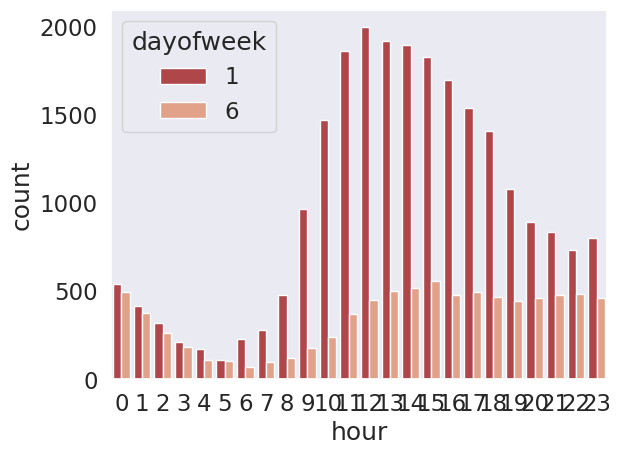

In [59]:
df4 = df[(df.dayofweek==1) | (df.dayofweek==6)]
sns.countplot(data=df4, x=df4.hour, hue=df4.dayofweek)